## Ensemble Learning

**Ensemble is a framework in which a number of Machine Learning Models are grouped together to perform a function. In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.**

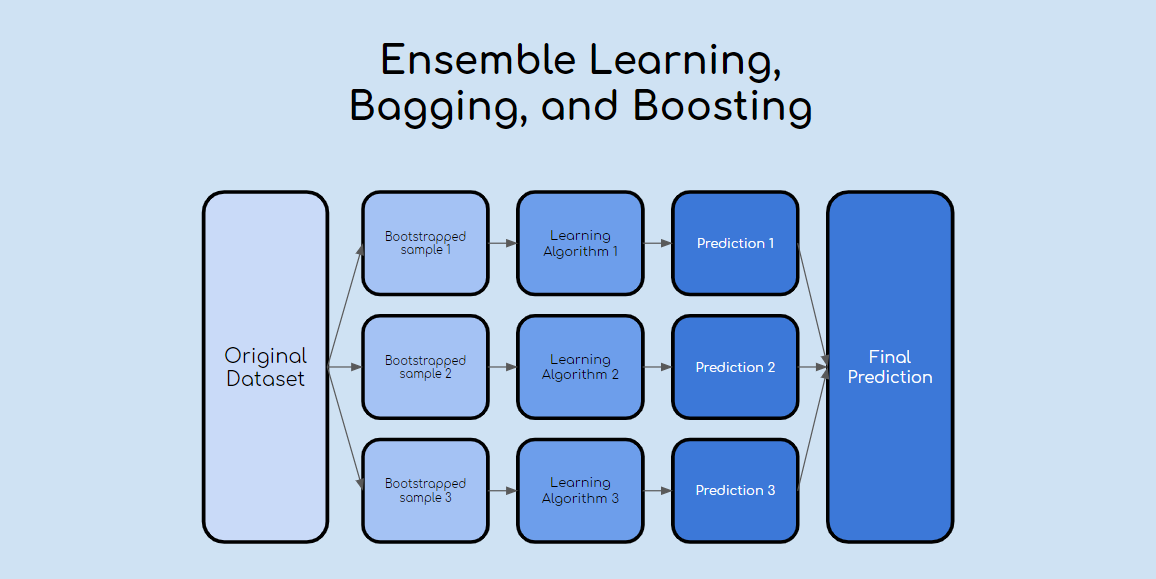

### Collecting the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db = pd.read_csv('diabetes.csv')

In [3]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Fixing the target

y = db['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
y.shape

(768,)

In [7]:
# Fixing the features

X = db.drop(['Outcome'], axis = 1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
X.shape

(768, 8)

### Standardization of Features

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Splitting the data into training and testing

In [10]:
from sklearn.model_selection import train_test_split

X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 10)
X_sc_train.shape, X_sc_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### Model Building - Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 10)
rfc.fit(X_sc_train, y_train)

RandomForestClassifier(random_state=10)

### Model Performance

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

cm = confusion_matrix(y_test, rfc.predict(X_sc_test))
report = classification_report(y_test, rfc.predict(X_sc_test))

print ("The Confusion Matrix is: \n", cm)
print ("The Classification Report is: \n", report)

The Confusion Matrix is: 
 [[88  7]
 [28 31]]
The Classification Report is: 
               precision    recall  f1-score   support

           0       0.76      0.93      0.83        95
           1       0.82      0.53      0.64        59

    accuracy                           0.77       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.78      0.77      0.76       154



In [13]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Since the no of values in 0 class is higher as compared to 1, we go for balancing of the dataset using either upsampling or downsampling.**

### Hyper parameter tuning using GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

rfc_gs = GridSearchCV(rfc, {'n_estimators' : range (75, 125), 'criterion' : ['gini', 'entropy']})

In [15]:
rfc_gs.fit(X_sc_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(75, 125)})

In [16]:
# The parameters

rfc_gs.best_params_

{'criterion': 'entropy', 'n_estimators': 90}

### Building the best Random Forest Classifier

In [17]:
rfc_best = RandomForestClassifier(n_estimators = 90, criterion = 'entropy', random_state = 10)
rfc_best.fit(X_sc_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=90, random_state=10)

In [18]:
cm_best = confusion_matrix(y_test, rfc_best.predict(X_sc_test))
report_best = classification_report(y_test, rfc_best.predict(X_sc_test))

print ("The best Confusion Matrix is: \n", cm_best)
print ("The best Classification Report is: \n", report_best)

The best Confusion Matrix is: 
 [[85 10]
 [31 28]]
The best Classification Report is: 
               precision    recall  f1-score   support

           0       0.73      0.89      0.81        95
           1       0.74      0.47      0.58        59

    accuracy                           0.73       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



In [19]:
print (cm)
print ('\n')
print (report)

[[88  7]
 [28 31]]


              precision    recall  f1-score   support

           0       0.76      0.93      0.83        95
           1       0.82      0.53      0.64        59

    accuracy                           0.77       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.78      0.77      0.76       154



**Choose rfc as the best model based on the accuracy achieved. Since, the performance of the model has gone down even after hyper-parameter tuning, we have to address the imbalancing of the dataset.**

### Identifying the important features

In [20]:
rfc.feature_importances_

array([0.08385035, 0.28092579, 0.08692066, 0.07168775, 0.06268108,
       0.15248522, 0.1230849 , 0.13836427])

In [21]:
df =pd.DataFrame({'Features':X.columns, 'Feature_Imp': rfc.feature_importances_})
df

,Features,Feature_Imp
0,Pregnancies,0.083850
1,Glucose,0.280926
2,BloodPressure,0.086921
3,SkinThickness,0.071688
4,Insulin,0.062681
5,BMI,0.152485
6,DiabetesPedigreeFunction,0.123085
7,Age,0.138364


In [22]:
df = df.sort_values(['Feature_Imp'], ascending = False)
df

,Features,Feature_Imp
1,Glucose,0.280926
5,BMI,0.152485
7,Age,0.138364
6,DiabetesPedigreeFunction,0.123085
2,BloodPressure,0.086921
0,Pregnancies,0.083850
3,SkinThickness,0.071688
4,Insulin,0.062681


In [23]:
df.sum()

Features       GlucoseBMIAgeDiabetesPedigreeFunctionBloodPres...
Feature_Imp                                                  1.0
dtype: object

In [24]:
# Adding another column

df['Feature_Imp_Cum'] = df['Feature_Imp'].cumsum() # cumsum() gives us the cumulative sum.
df

,Features,Feature_Imp,Feature_Imp_Cum
1,Glucose,0.280926,0.280926
5,BMI,0.152485,0.433411
7,Age,0.138364,0.571775
6,DiabetesPedigreeFunction,0.123085,0.694860
2,BloodPressure,0.086921,0.781781
0,Pregnancies,0.083850,0.865631
3,SkinThickness,0.071688,0.937319
4,Insulin,0.062681,1.000000


### Resolving the imbalance of the dataset

In [25]:
# Splitting the data into 2 according to the class

db_1 = db[db['Outcome'] == 1]
db_1.shape

(268, 9)

In [26]:
db_0 = db[db['Outcome'] == 0]
db_0.shape

(500, 9)

In [27]:
268/768

0.3489583333333333

In [28]:
500/768

0.6510416666666666

### Upsampling

In [29]:
from sklearn.utils import resample

db_1_up = resample (db_1, replace = True, random_state = 100, n_samples = 350)
db_1_up.shape

(350, 9)

In [30]:
db_1_up

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
14,5,166,72,19,175,25.8,0.587,51,1
214,9,112,82,32,175,34.2,0.260,36,1
152,9,156,86,28,155,34.3,1.189,42,1
187,1,128,98,41,58,32.0,1.321,33,1
662,8,167,106,46,231,37.6,0.165,43,1
...,...,...,...,...,...,...,...,...,...
546,5,187,76,27,207,43.6,1.034,53,1
218,5,85,74,22,0,29.0,1.224,32,1
493,4,125,70,18,122,28.9,1.144,45,1
207,5,162,104,0,0,37.7,0.151,52,1


### Downsampling

In [31]:
db_0_down = resample (db_0, replace = False, random_state = 100, n_samples = 418)
db_0_down.shape

(418, 9)

In [32]:
db_0_down

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
107,4,144,58,28,140,29.5,0.287,37,0
55,1,73,50,10,0,23.0,0.248,21,0
721,1,114,66,36,200,38.1,0.289,21,0
532,1,86,66,52,65,41.3,0.917,29,0
89,1,107,68,19,0,26.5,0.165,24,0
...,...,...,...,...,...,...,...,...,...
208,1,96,64,27,87,33.2,0.289,21,0
557,8,110,76,0,0,27.8,0.237,58,0
299,8,112,72,0,0,23.6,0.840,58,0
649,0,107,60,25,0,26.4,0.133,23,0


### Creating the revised dataset by combining

In [33]:
db_new = pd.concat([db_1_up, db_0_down])
db_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
14,5,166,72,19,175,25.8,0.587,51,1
214,9,112,82,32,175,34.2,0.260,36,1
152,9,156,86,28,155,34.3,1.189,42,1
187,1,128,98,41,58,32.0,1.321,33,1
662,8,167,106,46,231,37.6,0.165,43,1
...,...,...,...,...,...,...,...,...,...
208,1,96,64,27,87,33.2,0.289,21,0
557,8,110,76,0,0,27.8,0.237,58,0
299,8,112,72,0,0,23.6,0.840,58,0
649,0,107,60,25,0,26.4,0.133,23,0


### Shuffling the dataset

In [34]:
from sklearn.utils import shuffle

db_new = shuffle (db_new)
db_new.shape

(768, 9)

In [35]:
db_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
325,1,157,72,21,168,25.6,0.123,24,0
579,2,197,70,99,0,34.7,0.575,62,1
740,11,120,80,37,150,42.3,0.785,48,1
172,2,87,0,23,0,28.9,0.773,25,0
204,6,103,72,32,190,37.7,0.324,55,0
...,...,...,...,...,...,...,...,...,...
301,2,144,58,33,135,31.6,0.422,25,1
234,3,74,68,28,45,29.7,0.293,23,0
128,1,117,88,24,145,34.5,0.403,40,1
93,4,134,72,0,0,23.8,0.277,60,1


### Redefining the new target variable

In [36]:
# Defining the new target variable

y_tar = db_new['Outcome']
y_tar.shape

(768,)

In [37]:
y_tar

325    0
579    1
740    1
172    0
204    0
      ..
301    1
234    0
128    1
93     1
711    0
Name: Outcome, Length: 768, dtype: int64

### Redefining the new feature set

In [38]:
# Defining the new feature set

X_1 = db_new.drop(['Outcome'], axis = 1)
X_1.shape

(768, 8)

In [39]:
X_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
325,1,157,72,21,168,25.6,0.123,24
579,2,197,70,99,0,34.7,0.575,62
740,11,120,80,37,150,42.3,0.785,48
172,2,87,0,23,0,28.9,0.773,25
204,6,103,72,32,190,37.7,0.324,55
...,...,...,...,...,...,...,...,...
301,2,144,58,33,135,31.6,0.422,25
234,3,74,68,28,45,29.7,0.293,23
128,1,117,88,24,145,34.5,0.403,40
93,4,134,72,0,0,23.8,0.277,60


### Restandardizing the new feature set

In [40]:
# Restandardizing the new feature set

scaler = StandardScaler()
X_sc_1 = scaler.fit_transform (X_1)
X_sc_1

array([[-0.89155561,  0.96926957,  0.11496554, ..., -0.87113045,
        -1.08257375, -0.86628766],
       [-0.59616531,  2.16054627,  0.01669783, ...,  0.27809873,
         0.26213481,  2.37953839],
       [ 2.06234735, -0.13266138,  0.50803636, ...,  1.23789453,
         0.88688878,  1.18370774],
       ...,
       [-0.89155561, -0.22200713,  0.90110719, ...,  0.25284094,
        -0.24956845,  0.50037594],
       [-0.00538472,  0.28428547,  0.11496554, ..., -1.09845051,
        -0.62442084,  2.20870544],
       [ 0.29000558,  0.04603013,  0.40976866, ..., -0.36597477,
        -0.14246777,  0.50037594]])

### Resplitting the data into train and test data

In [41]:
# Splitting the data into train and test

X_sc_1_train, X_sc_1_test, y_tar_train, y_tar_test = train_test_split(X_sc_1, y_tar, test_size = 0.2, random_state = 100)
X_sc_1_train.shape, X_sc_1_test.shape, y_tar_train.shape, y_tar_test.shape

((614, 8), (154, 8), (614,), (154,))

### Rebuilding the model

In [42]:
# Building the model

rfc_1 = RandomForestClassifier(random_state = 10)
rfc_1.fit(X_sc_1_train, y_tar_train)

RandomForestClassifier(random_state=10)

### Determining the Model Performance

In [43]:
cm_1 = confusion_matrix(y_tar_test, rfc_1.predict(X_sc_1_test))
report_1 = classification_report(y_tar_test, rfc_1.predict(X_sc_1_test))

print ("The new Confusion Matrix is: \n", cm_1)
print ("The new Classification Report is: \n", report_1)

The new Confusion Matrix is: 
 [[73  7]
 [ 5 69]]
The new Classification Report is: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        80
           1       0.91      0.93      0.92        74

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



### Hyper - parameter tuning using GridSearchCV

In [44]:
rfc_1_gs = GridSearchCV(rfc_1, {'n_estimators': range (75, 150), 'criterion' : ['gini', 'entropy']})

In [45]:
rfc_1_gs.fit(X_sc_1_train, y_tar_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(75, 150)})

### Determining the best parameters

In [46]:
rfc_1_gs.best_params_

{'criterion': 'gini', 'n_estimators': 142}

### Building the new best Random Forest Classifier with the revamped hyper-parameter tuning

In [47]:
rfc_best_1 = RandomForestClassifier(n_estimators = 116, criterion = 'gini', random_state = 100)
rfc_best_1.fit (X_sc_1_train, y_tar_train)

RandomForestClassifier(n_estimators=116, random_state=100)

### Finding the new model performance

In [48]:
cm_best_1 = confusion_matrix(y_tar_test, rfc_best_1.predict(X_sc_1_test))
report_best_1 = classification_report(y_tar_test, rfc_best_1.predict(X_sc_1_test))

print ("The renewed Confusion Matrix is: \n", cm_best_1)
print ("The renewed Classification Report is: \n", report_best_1)

The renewed Confusion Matrix is: 
 [[72  8]
 [ 7 67]]
The renewed Classification Report is: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91        80
           1       0.89      0.91      0.90        74

    accuracy                           0.90       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.90      0.90      0.90       154



In [49]:
print (cm_1)
print ("\n")
print (report_1)

[[73  7]
 [ 5 69]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.92        80
           1       0.91      0.93      0.92        74

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154

